# Projeto 1 - Ciência dos Dados

Nome: Arthur Cisotto Machado

Nome: Alessandra Yumi Carvalho Ogawa

#### CONTEXTO DO PROJETO 

A empresa de streaming *Netflix* em parceria com o estúdio espanhol *Vancouver Media* deseja saber e analisar como a audiencia está reagindo a série de sucesso *La Casa de Papel* na rede social Twitter. 
O projeto exige a criação de um programa que consiga classificar os tweets entre **relevantes** ou **irrelevantes** para a análise da empresa.

A classificação foi feita com o intúito de ajudar a área de marketing das duas empresas parceiras a acharem comentários que possam ser úteis em algum sentido estratégio para mudança de operações internas e também como fonte de *feedback* em relação ao conteúdo cinematográfico produzido.

___
#### CARREGANDO AS BIBLIOTECAS UTILIZADAS NO PROGRAMA:

In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import emoji
from emoji import UNICODE_EMOJI
import nltk 
from nltk.stem import RSLPStemmer
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alessandrayumiogawa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alessandrayumiogawa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/alessandrayumiogawa/Documents/INSPER/INSPER - 2A/C-DADOS/P1_CDados


___
#### FUNÇÃO DE LIMPEZA DOS TWEETS:
- tira sinais de pontuação irrelevantes para o texto;
- todas as fontes são convertidas para letras minúsculas para evitar diferenciação pelo classificador;
- exclui repetição de emoji;
- substitui emoji por seu código;

In [42]:
# https://docs.python.org/3/library/re.html#


def cleanup(text):

    punctuation = '[”/-@\\n:;?\"\'().,]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    text_split = text_subbed.split()
    return ' '.join(text_split).lower()

def limpa_emoji(tweet):
    
    modified=' '.join(emoji.get_emoji_regexp().split(tweet))
    modified=modified.split()
    for i,emoji1 in enumerate(modified):
        if emoji1 in UNICODE_EMOJI['pt']:
            modified[i]=UNICODE_EMOJI['pt'][emoji1].replace(':','')
        elif emoji1 in UNICODE_EMOJI['en']:
            modified[i]=UNICODE_EMOJI['en'][emoji1].replace(':','')
        else:
            continue
    modified=' '.join(modified)
        
    return modified

#### OUTRAS FUNÇÕES DE LIMPEZA 
Como proposta de outras limpezas/transformações que não afetem a qualidade da informação decidimos fazer a limpeza de stopwords, isso é, a remoção de palavras como preposições, pronomes, artigos e verbos de estado que não afetam a qualidade do conteúdo geral dos tweets.


In [43]:
##Função que remove palavras comuns que não afetam a qualidade da informação contida, como preposições, pronomes, artigos e verbos de estado.
def remove_stopwords(lista_palavras):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    frase = []
    for palavra in lista_palavras:
        if palavra not in stopwords:
            frase.append(palavra)
    return frase


In [44]:
##Todas as palavras consideradas como stopwords pela biblioteca usada:
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [45]:
#compilado das funções de limpeza em uma só para mais fácil aplicação
def limpeza_total(tweet):
    texto_sem_pontuacoes = cleanup(tweet)
    sem_emoji = limpa_emoji(texto_sem_pontuacoes)
    lista_tweet = sem_emoji.split()
    lista_tweet_sem_stopwords = remove_stopwords(lista_tweet)
    tweet_limpo = ' '.join(lista_tweet_sem_stopwords)
    return tweet_limpo

___
#### CARREGANDO A BASE DE DADOS COM OS TWEETS CLASSIFICADOS COMO ***RELEVANTES*** E ***IRRELEVANTES*** MANUALMENTE:

In [46]:
filename = 'la casa de papel.xlsx'

Separação do documento em dois DataFrames diferentes: **Treinamento** e **Teste**.

- **Treinamento**: composto por 300 tweets classificados manualmente, será usado para *ensinar* o programa a classificar um tweets de acorodo com a sua relevância levando em conta as palavras em seu conteúdo.

- **Teste**: composto por 200 tweets classificados manualmente, será usado para *testar* o programa classificador e comparar o resultado com a classificação feita à mão anteriormente. 

In [47]:
train = pd.read_excel(filename)
train['Treinamento'] = train['Treinamento'].apply(limpeza_total) #aplicando a função de limpeza
train.head(5)


,Treinamento,"Classificação (relevante = 1, não relevante = 0)"
0,tô vendo la casa papel mdssss primeiro ep tira...,1.0
1,agora vou assistir lá casa papel dormir porq a...,0.0
2,dedo coçando pra assistir lá casa papel espera...,0.0
3,la casa papel faz torcer pros bandidos,1.0
4,la casa papel acabou comigo encontro desidrata...,1.0


In [48]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test['Teste'] = test['Teste'].apply(limpeza_total)
test.head(5)


,Teste,"Classificação (relevante = 1, não relevante = 0)"
0,quero terminar ver nova parte la casa papel má...,0
1,existe outra série mundo mexa comigo la casa p...,1
2,tá foda desviar todos spoilers la casa papel,1
3,todoroki_jun né tô sentindo lá casa papel,0
4,la casa papel tão ruim consegui terminar so t ...,1


**OBS**: a função de limpeza já foi aplicada no DataFrame de treinamento e  teste.

___
#### CLASSIFICADOR AUTOMÁTICO DE SENTIMENTO:


O filtro criado para a realização da classificação manual seguia o padrão especificado abaixo:

**RELEVANTES**: As mensagens de texto com relevância mostravam a opinião e sentimentos, sejam eles positivos ou negativos, sobre a série.
*Consideramos tweets relacionados a spoilers como relevantes pois eles também demonstram um forte sentimento que as pessoas possuem em relação à série.

**IRRELEVANTES**: Classificamos como não relevantes tweets que não se encaixaram na nossa classificação de relevância, tweets que falavam sobre tópicos pessoais ou tweets que falavam sobre algum personagem específico da série.



___
#### MONTANDO UM CLASSIFICADOR NAÏVE-BAYES:


- PREPARANDO OS DADOS DO TREINAMENTO

In [49]:
#criando filtros para separar os tweets relevantes dos irrelevantes

filtro_nao_relevante = train['Classificação (relevante = 1, não relevante = 0)']==0
filtro_relevante = train['Classificação (relevante = 1, não relevante = 0)']==1


In [50]:
#separando em dois DFs diferentes os tweets relevantes e irrelevantes

relevantes_train = train[filtro_relevante]
nao_relevantes_train = train[filtro_nao_relevante]

In [51]:
#criando uma string grande para armazenar todos os tweets de cada classificação

relevantes_train_txt = ''
for tweet in relevantes_train['Treinamento']:
    relevantes_train_txt += " "
    relevantes_train_txt += str(tweet)

nao_relevantes_train_txt = ''
for tweet in nao_relevantes_train['Treinamento']:
    nao_relevantes_train_txt += " "
    nao_relevantes_train_txt += str(tweet)

In [52]:
#organizando os tweets em listas de palavras e pandas Series 

#fazendo a lista com todas as palavaras dos tweets
todas_palavras_relevantes = relevantes_train_txt.split()
todas_palavras_irrelevantes = nao_relevantes_train_txt.split()

#transformando a lista em uma panda Series
serie_relevante = pd.Series(todas_palavras_relevantes)
serie_irrelevante = pd.Series(todas_palavras_irrelevantes)


- PREPARANDO AS TABELAS DE FREQUÊNCIA ABSOLUTA

In [53]:
tabela_relevante = serie_relevante.value_counts()
tabela_irrelevante = serie_irrelevante.value_counts()

Considerando que o conjunto universo seja apenas a soma de todas as palavras em tweets relevantes e irrelevantes na base de treinamento, a seguir cria-se esse conjunto somando as strings de ambas. 

Além disso prosseguiu-se com o tratamento de dados criando uma lista com todas essas palavras e depois um pandas Series onde pode-se realizar a contagem da frequência de cada palavra e a partir daí começar o treinamento do programa partindo do conjunto universo de palavras.

Para finalizar o tratamento do conjunto universo de palavras, cria-se uma lista de palavras excluindo as repetidas que serão usadas depois no método de ***Suavização de Laplace***.

In [54]:
#organizando o conjunto universo de todas as palavras

palavras = relevantes_train_txt + nao_relevantes_train_txt
todas_palavras = palavras.split()
serie_palavras = pd.Series(todas_palavras)
tabela_palavras = serie_palavras.value_counts(normalize=True)


palavras_sem_repeticao = []
for e in todas_palavras:
    if e not in palavras_sem_repeticao:
        palavras_sem_repeticao.append(e)

- MONTANDO AS PROBABILIDADES

##### Definindo os eventos:

- $P(tweet|R)$: probabilidade de o tweet ser classificado como relevante;
- $P(tweet|IR)$: probabilidade de o tweet ser classificado como irrelevante;
- $P(R)$: probabilidade de um tweet ser relevante;
- $P(IR)$: probabilidade de um tweet ser irrelevante;

$$\quad P(R) = \frac{N palavras RELEVANTES}{N total palavras}$$  
$$\quad P(IR) = \frac{N palavras IRRELEVANTES}{N total palavras}$$

In [55]:
#calculando a probabilidade de um tweet ser relevante ou irrelevante
probR = len(serie_relevante)/len(serie_palavras)
probIR = len(serie_irrelevante)/len(serie_palavras)

##### Aplicação do Teorema de Bayes:

Apresentação do teorema:
$\quad P(A|B) = \frac{P(B|A)P(A)}{P(B)}$  
  
Que nesse contexto seria equivalente à:  
  
$$\quad P(R|tweet) = \frac{P(tweet|R)P(R)}{P(tweet)}$$  
$$\quad P(IR|tweet) = \frac{P(tweet|IR)P(IR)}{P(tweet)}$$  
  
É necessário realizar o cálculo de $P(tweet|R)$ e $P(tweet|IR)$ para aplicar o teorema e desse modo calcular a probbilidade de o tweet ser classificado como **relevante** ou **irrelevante**.

In [56]:
#PRIMEIRA FUNÇÃO: calculando a probabilidade de uma X aparecer dado um dos conjuntos (relevante ou irrelevante)

def probDadoconj(palavra, prob_conj, lista_palavras_conj):
    if palavra in lista_palavras_conj:
        return prob_conj[palavra]
    else:
        return 0

#exemplo: print(probDadoconj("la", tabela_relevante, todas_palavras_relevantes))

##### Suavização de Laplace ("Laplace Soothing"):

Essa técnica é utilizada para evitar que uma probabilidade seja ZERO caso o Teorema de Bayes seja aplicado à uma amostra fora da base de dados que compõe o conjunto universo do que está sendo considerado como a totalidade de palavras em tweets.  

A possibilidade de resultar em zero vem do cálculo da probabilidade de um tweet ser classificado como relevante ou irrelevante já que é efetuada a multiplicação entre as probabilidades de cada palavra ser um indicador de relevância ou irrelevância.  

Aplicando a suavização:
$$\quad P(palavra|conjunto) = \frac{P(palavra|conjunto)+1}{palavras  conjunto + palavras sem repetição}$$  

In [57]:
#SEGUNDA FUNÇÃO: aplicando a suavização de Laplace

def aplicando_laplace(prob_dado_conj, lista_palavras_conj):
    return (prob_dado_conj+1)/(len(lista_palavras_conj)+len(palavras_sem_repeticao))


- CLASSIFICAÇÃO FINAL: 

Para realizar a classificação compila-se ambas as funções em uma só para que seja mais fácil de aplicar para todo o documento de tweets na base de treino.  

Nela é calculada a probabilidade de um tweet ser classificado como relevante e como irrelevante e no fim é feita uma comparação retornando a classificação com maior probabilidade de ocorrer:  

$\quad \Rightarrow$ Se $P(R|tweet) > P(IR|tweet)$, então o tweet será classificado como de **relevante**.

$\quad \Rightarrow$ Se $P(IR|tweet) > P(R|tweet)$, então o tweet será classificado como de **irrelevante**.

**Lembrando que**: a probabilidade é construída multiplicando a probabilidade de cada palavra na frase do tweet estar presente em relevância ou irrelevância:  

$\quad P(tweet|conj) = 
P(palavra1|conj)\cdot P(palavra2|conj)\cdot P(palavra3|conj)\cdot P(palavra4|conj)\cdot...$  

E portanto a fórmula ficará:  

$P(conj|tweet) = P(palavra1|conj)\cdot P(palavra2|conj)\cdot P(palavra3|conj)\cdot P(palavra4|conj)\cdot... P(conj)$  
Vale ressaltar que a divisão por $P(tweet)$ não é necessária na hora de fazer a comparação uma vez que em ambas a probabilidades isso seria feito, então podemos tratá-lo como um fator comum no cálculo e desconsiderar a divisão por simplificação da fórmula.

In [58]:
#FUNÇÃO FINAL: compilado das duas funções anteriores
#essa função realiza duas vezes as funções escritas anteriormente e depois comparam seus resultados para classificar

def Classificacao(tweet):
    prob_relevante = 1
    lista_tweet = tweet.split()
    for palavra in lista_tweet:
        prob = probDadoconj(palavra, tabela_relevante, todas_palavras_relevantes)
        prob_laplace = aplicando_laplace(prob, todas_palavras_relevantes)
        prob_relevante *= prob_laplace
    probRtweet = prob_relevante*probR
    prob_irrelevante = 1
    for palavra in lista_tweet:
        prob = probDadoconj(palavra, tabela_irrelevante, todas_palavras_irrelevantes)
        prob_laplace = aplicando_laplace(prob, todas_palavras_irrelevantes)
        prob_irrelevante *= prob_laplace
    probIRtweet = prob_irrelevante*probIR
    if probRtweet < probIRtweet: 
        return 0 #Irrelevante
    else: 
        return 1 #Relevante


#### Testando a função na base de treinamento (PRIEMIRO TESTE): 

In [59]:
train['Classificacao_Naive_Bayes'] = train.Treinamento.apply(Classificacao)
train

,Treinamento,"Classificação (relevante = 1, não relevante = 0)",Classificacao_Naive_Bayes
0,tô vendo la casa papel mdssss primeiro ep tira...,1.0,1
1,agora vou assistir lá casa papel dormir porq a...,0.0,0
2,dedo coçando pra assistir lá casa papel espera...,0.0,0
3,la casa papel faz torcer pros bandidos,1.0,1
4,la casa papel acabou comigo encontro desidrata...,1.0,1
...,...,...,...
295,tô aqui assistindo la casa papel ler todos spo...,0.0,0
296,achei nenhuma morte la casa papel ia superar n...,1.0,1
297,caralho to chorando igual vagabunda porra la c...,1.0,1
298,cara nunca chorei tanto quanto chorei olhando ...,1.0,1


In [60]:
#Porcentagem de acerto no conjunto de Treino:

verdadeiros_positivos_train=train.loc[(train['Classificacao_Naive_Bayes']==1)&(train['Classificação (relevante = 1, não relevante = 0)']==1),:].shape[0]
verdadeiros_negativos_train=train.loc[(train['Classificacao_Naive_Bayes']==0)&(train['Classificação (relevante = 1, não relevante = 0)']==0),:].shape[0]
print(f'A acurácia na base de treinamento foi de: {((verdadeiros_positivos_train+verdadeiros_negativos_train)/train.shape[0])*100}%')

A acurácia na base de treinamento foi de: 94.33333333333334%


___
#### BASE DE TESTE:

- VERIFICANDO A PERFORMANCE DO CLASSIFICADOR



In [61]:
test['Classificacao_Naive_Bayes'] = test['Teste'].apply(Classificacao)
test

,Teste,"Classificação (relevante = 1, não relevante = 0)",Classificacao_Naive_Bayes
0,quero terminar ver nova parte la casa papel má...,0,0
1,existe outra série mundo mexa comigo la casa p...,1,1
2,tá foda desviar todos spoilers la casa papel,1,1
3,todoroki_jun né tô sentindo lá casa papel,0,1
4,la casa papel tão ruim consegui terminar so t ...,1,0
...,...,...,...
195,respeito casal fav la casa papel morto literal...,0,1
196,assistindo la casa papel poder falar mal mão_e...,0,0
197,sexo kk veste roupa aí gente vai maratonar la ...,0,0
198,deus final la casa papel…………,1,1


- DESCRIÇÃO DA PERFORMANCE DO CLASSIFICADOR:

As contagens a seguir são feitas comparando os valores da coluna em que fizemos a classificação manualmente *"Classificação (relevante = 1, não relevante = 0)"* com os valores da coluna em que a classificação foi feita de maneira automática pela função criada anteriormente para nosso classificador *"Classificacao_Naive_Bayes"*.

- Porcentagem de verdadeiros positivos (mensagens relevantes e que são classificadas como relevantes):

In [62]:
verdadeiros_positivos=test.loc[(test['Classificacao_Naive_Bayes']==1)&(test['Classificação (relevante = 1, não relevante = 0)']==1),:].shape[0]
print(f'A porcentagem de verdadeiros positivos na base de teste foi de: {(verdadeiros_positivos/test.shape[0])*100}%')

A porcentagem de verdadeiros positivos na base de teste foi de: 51.0%


- Porcentagem de falsos positivos (mensagens irrelevantes e que são classificadas como relevantes):

In [63]:
falsos_positivos=test.loc[(test['Classificacao_Naive_Bayes']==1)&(test['Classificação (relevante = 1, não relevante = 0)']==0),:].shape[0]
print(f'A porcentagem de falsos positivos na base de teste foi de: {(falsos_positivos/test.shape[0])*100}%')

A porcentagem de falsos positivos na base de teste foi de: 22.5%


- Porcentagem de verdadeiros negativos (mensagens irrelevantes e que são classificadas como irrelevantes):



In [64]:
verdadeiros_negativos=test.loc[(test['Classificacao_Naive_Bayes']==0)&(test['Classificação (relevante = 1, não relevante = 0)']==0),:].shape[0]
print(f'A porcentagem de verdadeiros negativos na base de teste foi de: {(verdadeiros_negativos/test.shape[0])*100}%')

A porcentagem de verdadeiros negativos na base de teste foi de: 19.5%


- Porcentagem de falsos negativos (mensagens relevantes e que são classificadas como irrelevantes):

In [65]:
falsos_negativos=test.loc[(test['Classificacao_Naive_Bayes']==0)&(test['Classificação (relevante = 1, não relevante = 0)']==1),:].shape[0]
print(f'A porcentagem de falsos negativos na base de teste foi de: {(falsos_negativos/test.shape[0])*100}%')

A porcentagem de falsos negativos na base de teste foi de: 7.000000000000001%


- Acurácia (mensagens corretamente classificadas, independente da categoria):

In [66]:
print(f'A acurácia na base de teste foi de: {((verdadeiros_positivos+verdadeiros_negativos)/test.shape[0])*100}%')

A acurácia na base de teste foi de: 70.5%


___
#### CONCLUINDO:

#### Comparativo qualitativo sobre os percentuais obtidos:

#### Mensagens com dupla negação e sarcasmo e a ingenuidade do Naïve Bayes:

O programa Naïve Bayes pode ser caracterizadom como um sitema ingênuo, uma vez que dentro do calculo das probabilidades ele considera que cada palavra dentro dos tweets são independentes entre si, e que suas probabilidades de aparição independem completamente dos elementos que a antecedem ou a seguem. Isso porque o programa não conhece a língua portuguesa ou qualquer outra língua falada; a gramática e regras de escrita/fala não é conhecida pelo algorítmo, tudo que ele tem é um universo reduzido de palavras na língua portuguesa providos da base de 500 tweets selecionados no começo do projeto. Isso ajuda a explicar a falha que o programa apresenta ao se deparar com textos sarcásticos ou com outras figuras de linguagem.

Tanto o sarcasmo quanto a dupla negação são elementos de linguagem que vêm do uso cotidiano e "relaxado" da língua. Não existe nenhuma regra formal concretizada que defina um padrão no uso de nenhuma delas.  

Com isso dito começa a ficar claro como o programa reage à tweets sarcasticos ou que contém dupla negação. Como ele não conhece as características específicas da linguagem, o programa vai tratar a frase com o sentido **literal**, que muitas vezes é o oposto do que o sarcasmo ou a dupla negação querem dizer.  

Por isso pode-se dizer que o programa pode ser flaho na hora de classificar tweets desse gênero, dada sua incapacidade de compreender as especificidades da língua portuguesa.

#### Dependência da classificação manual para alimentação da base de dados:

Como abordado anteriormente, o programa desconhece as especificidades das línguas, muitas vezes flahando em classificar corretamente expressões de linguagem, ditados populares ou figuras de linguagem.  

Isso impossibilita que a classificação automática de novos tweets para a base de dados seja feita uma vez que a classificação errônea desses casos criaria uma incerteza e inconsistência na classificação dos demais que com o tempo seria propagada contribuido negativamente para a maiior acurácia e eficácia do programa.

#### Plano de expansão:

#### Diferentes cenários de uso para o classificador Naive-Bayes:

#### Possíveis melhorias no classificador e como implementá-las:

- Ainda mais limpezas na base de dados:  
    Além da limpeza de stopwords, poderíamos propor outras limpezas/transformações que não afetem a qualidade da informação.  
    Alguns exemplos:  
    - Stemming: 
    - Lemmatization:    
- N-grams:
- TF-IDF

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Para fazer esse item do Projeto, utilizamos a biblioteca scikit-learn (sklearn) que contém diversas funções úteis para a análise preditiva de dados. Em especial, utilizaremos a função train_test_split que divide listas e séries de dados em bases de treinamento e teste aleatoriamente.

In [67]:
from sklearn.model_selection import train_test_split

Para poder usar a função para dividir nossa base inteira em novas bases de treinamento e teste, primeiramente vamos unir as duas bases em uma única série a partir da função 'concat' do Pandas.  
  
Para que todos os tweets fiquem em um uma única coluna para que eles possam ser divididos novamente, precisamos renomear a coluna que descrevia se ele fazia parte do teste ou treinamento para um nome unificado 'Tweets'.  
  
Ademais, precisamos remover a coluna de classificação feita pelo nosso classificador ('Classificacao_Naive_Bayes'), para que ela possa ser feita novamente em cada uma das repetições do processo com base na nova base de treinamento.  
  
*Note que não precisamos aplicar as funções de limpeza novamente nas bases pois a base total de tweets já está sendo criada com as séries previamente limpas.

In [68]:
train_para_concat = train
train_para_concat = train_para_concat.rename(columns={"Treinamento": "Tweets"})
train_para_concat =train_para_concat.drop(['Classificacao_Naive_Bayes'], axis=1)
train_para_concat

,Tweets,"Classificação (relevante = 1, não relevante = 0)"
0,tô vendo la casa papel mdssss primeiro ep tira...,1.0
1,agora vou assistir lá casa papel dormir porq a...,0.0
2,dedo coçando pra assistir lá casa papel espera...,0.0
3,la casa papel faz torcer pros bandidos,1.0
4,la casa papel acabou comigo encontro desidrata...,1.0
...,...,...
295,tô aqui assistindo la casa papel ler todos spo...,0.0
296,achei nenhuma morte la casa papel ia superar n...,1.0
297,caralho to chorando igual vagabunda porra la c...,1.0
298,cara nunca chorei tanto quanto chorei olhando ...,1.0


In [69]:
test_para_concat = test
test_para_concat = test_para_concat.rename(columns={"Teste": "Tweets"})
test_para_concat =test_para_concat.drop(['Classificacao_Naive_Bayes'], axis=1)
test_para_concat

,Tweets,"Classificação (relevante = 1, não relevante = 0)"
0,quero terminar ver nova parte la casa papel má...,0
1,existe outra série mundo mexa comigo la casa p...,1
2,tá foda desviar todos spoilers la casa papel,1
3,todoroki_jun né tô sentindo lá casa papel,0
4,la casa papel tão ruim consegui terminar so t ...,1
...,...,...
195,respeito casal fav la casa papel morto literal...,0
196,assistindo la casa papel poder falar mal mão_e...,0
197,sexo kk veste roupa aí gente vai maratonar la ...,0
198,deus final la casa papel…………,1


In [70]:
base_inteira_tweets = pd.concat([train_para_concat, test_para_concat], ignore_index=True, sort=False)
base_inteira_tweets

,Tweets,"Classificação (relevante = 1, não relevante = 0)"
0,tô vendo la casa papel mdssss primeiro ep tira...,1.0
1,agora vou assistir lá casa papel dormir porq a...,0.0
2,dedo coçando pra assistir lá casa papel espera...,0.0
3,la casa papel faz torcer pros bandidos,1.0
4,la casa papel acabou comigo encontro desidrata...,1.0
...,...,...
495,respeito casal fav la casa papel morto literal...,0.0
496,assistindo la casa papel poder falar mal mão_e...,0.0
497,sexo kk veste roupa aí gente vai maratonar la ...,0.0
498,deus final la casa papel…………,1.0


#### Separando a base inteira entre treinamento e teste 100 vezes e calculando a acurácia do classificador em cada uma das separações:
  
Em cada repetição do loop, a função train_test_split está sendo executada dividindo a base completa em novas bases de treinamento ('base_train') e teste ('base_test') mantendo a proporção de 200 tweets como teste (40%) e os outros 300 (60%) como treinamento, já que isso é especificado no parâmetro 'test_size' da função. O parâmetro 'random_state' com valor None garante que a cada vez que o loop repetir, uma nova divisão será feita, se ele recebesse um valor int específico a função faria a exata mesma divisão em todas as repetições do loop.

In [71]:
lista_acuracias = []
for i in range(100):
    #separando a base completa aleatoriamente entre train e test, mantendo a proporção de 200 tweets como teste (40%) e os outros 300 (60%) como treinamento
    base_train, base_test = train_test_split(base_inteira_tweets, test_size=0.4, random_state=None)
    #criando filtros para separar os tweets relevantes dos irrelevantes
    filtro_nao_relevante = base_train['Classificação (relevante = 1, não relevante = 0)']==0
    filtro_relevante = base_train['Classificação (relevante = 1, não relevante = 0)']==1

    #separando em dois DFs diferentes os tweets relevantes e irrelevantes
    relevantes_train = base_train[filtro_relevante]
    nao_relevantes_train = base_train[filtro_nao_relevante]

    #criando uma string grande para armazenar todos os tweets de cada classificação
    relevantes_train_txt = ''
    for tweet in relevantes_train['Tweets']:
        relevantes_train_txt += " "
        relevantes_train_txt += str(tweet)
    nao_relevantes_train_txt = ''
    for tweet in nao_relevantes_train['Tweets']:
        nao_relevantes_train_txt += " "
        nao_relevantes_train_txt += str(tweet)
    
    #organizando os tweets em listas de palavras e pandas Series 

    #fazendo a lista com todas as palavaras dos tweets
    todas_palavras_relevantes = relevantes_train_txt.split()
    todas_palavras_irrelevantes = nao_relevantes_train_txt.split()

    #transformando a lista em uma panda Series
    serie_relevante = pd.Series(todas_palavras_relevantes)
    serie_irrelevante = pd.Series(todas_palavras_irrelevantes)

    tabela_relevante = serie_relevante.value_counts()
    tabela_irrelevante = serie_irrelevante.value_counts()

    #organizando o conjunto universo de todas as palavras

    palavras = relevantes_train_txt + nao_relevantes_train_txt
    todas_palavras = palavras.split()
    serie_palavras = pd.Series(todas_palavras)
    tabela_palavras = serie_palavras.value_counts(normalize=True)


    palavras_sem_repeticao = []
    for e in todas_palavras:
        if e not in palavras_sem_repeticao:
            palavras_sem_repeticao.append(e)
    
    #calculando a probabilidade de um tweet ser relevante ou irrelevante
    probR = len(serie_relevante)/len(serie_palavras)
    probIR = len(serie_irrelevante)/len(serie_palavras)

    base_test['Classificacao_Naive_Bayes'] = base_test['Tweets'].apply(Classificacao)
    verdadeiros_positivos=base_test.loc[(base_test['Classificacao_Naive_Bayes']==1)&(base_test['Classificação (relevante = 1, não relevante = 0)']==1),:].shape[0]
    verdadeiros_negativos=base_test.loc[(base_test['Classificacao_Naive_Bayes']==0)&(base_test['Classificação (relevante = 1, não relevante = 0)']==0),:].shape[0]
    acuracia = ((verdadeiros_positivos+verdadeiros_negativos)/base_test.shape[0])*100
    lista_acuracias.append(acuracia)

<ipython-input-71-0c95f28b9264>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_test['Classificacao_Naive_Bayes'] = base_test['Tweets'].apply(Classificacao)
<ipython-input-71-0c95f28b9264>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_test['Classificacao_Naive_Bayes'] = base_test['Tweets'].apply(Classificacao)
<ipython-input-71-0c95f28b9264>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [72]:
#Demonstrando que o processo foi repetido 100 vezes e, portanto, temos 100 contagens de acurácias
len(lista_acuracias)

100

Text(0.5, 0, 'acurácia [em %]')

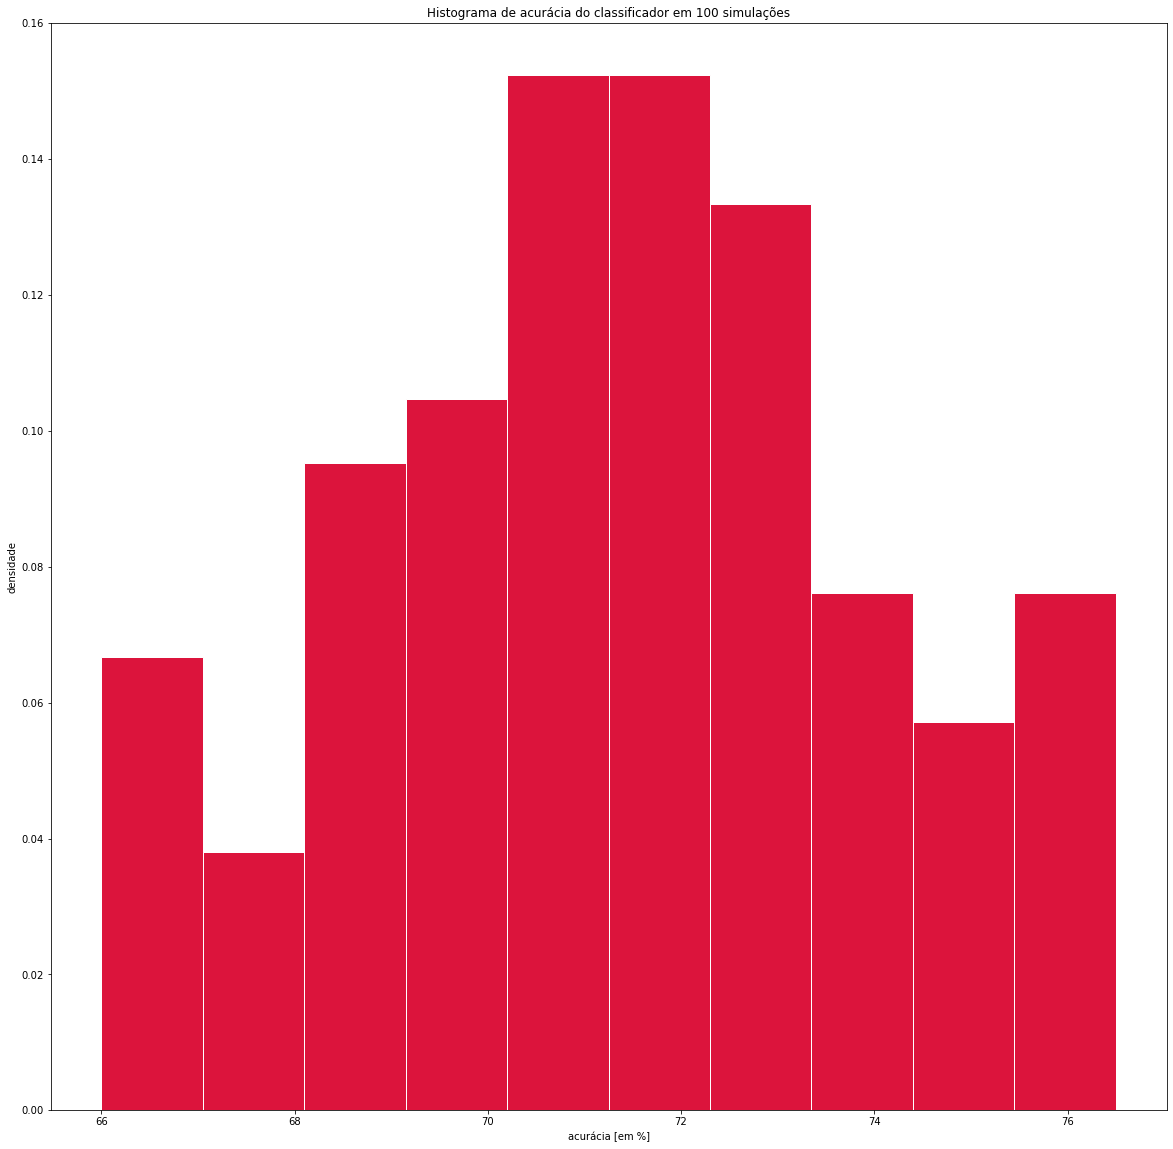

In [73]:
plt.figure(figsize=(20, 20))
plt.hist(lista_acuracias, bins=10, edgecolor='white', color='crimson', density=True)
plt.title('Histograma de acurácia do classificador em 100 simulações')
plt.ylabel('densidade')
plt.xlabel('acurácia [em %]')

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**